In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv("../data/popular_movies.csv")
df.head()

,title,budget,genres,original_language,overview,popularity,poster_path,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,production_companies,production_countries
0,Final Destination Bloodlines,50000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",en,"Plagued by a violent recurring nightmare, coll...",1179.7021,/6WxhEvFsauuACfv8HyoVX6mZKFj.jpg,2025-05-14,274218717,110,"[{'english_name': 'English', 'iso_639_1': 'en'...",7.218,1035,"[{'id': 12, 'logo_path': '/2ycs64eqV5rqKYHyQK0...","[{'iso_3166_1': 'US', 'name': 'United States o..."
1,Lilo & Stitch,100000000,"[{'id': 10751, 'name': 'Family'}, {'id': 878, ...",en,The wildly funny and touching story of a lonel...,412.5716,/c32TsWLES7kL1uy6fF03V67AIYX.jpg,2025-05-17,864080503,108,"[{'english_name': 'English', 'iso_639_1': 'en'...",7.100,677,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o..."
2,STRAW,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",en,What will be her last straw? A devastatingly b...,345.6187,/t3cmnXYtxJb9vVL1ThvT2CWSe1n.jpg,2025-06-05,0,105,"[{'english_name': 'English', 'iso_639_1': 'en'...",8.048,556,"[{'id': 3096, 'logo_path': '/fkZTZ4veYYr3lwr2r...","[{'iso_3166_1': 'US', 'name': 'United States o..."
3,The Amateur,60000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",en,After his life is turned upside down when his ...,334.9235,/SNEoUInCa5fAgwuEBMIMBGvkkh.jpg,2025-04-09,95956038,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",6.929,560,"[{'id': 127928, 'logo_path': '/h0rjX5vjW5r8yEn...","[{'iso_3166_1': 'US', 'name': 'United States o..."
4,How to Train Your Dragon,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 10751, '...",en,"On the rugged isle of Berk, where Vikings and ...",349.6505,/q5pXRYTycaeW6dEgsCrd4mYPmxM.jpg,2025-06-06,236807059,125,"[{'english_name': 'English', 'iso_639_1': 'en'...",8.000,334,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'US', 'name': 'United States o..."


In [17]:
df["is_hit"] = (df["revenue"] >= 2 * df["budget"]).astype(int)
df["is_hit"].value_counts()

is_hit
1    7504
0    2495
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9999 non-null   object 
 1   budget                9999 non-null   int64  
 2   genres                9999 non-null   object 
 3   original_language     9999 non-null   object 
 4   overview              9906 non-null   object 
 5   popularity            9999 non-null   float64
 6   poster_path           9941 non-null   object 
 7   release_date          9978 non-null   object 
 8   revenue               9999 non-null   int64  
 9   runtime               9999 non-null   int64  
 10  spoken_languages      9999 non-null   object 
 11  vote_average          9999 non-null   float64
 12  vote_count            9999 non-null   int64  
 13  production_companies  9999 non-null   object 
 14  production_countries  9999 non-null   object 
 15  is_hit               

In [19]:
df.isnull().sum()

title                    0
budget                   0
genres                   0
original_language        0
overview                93
popularity               0
poster_path             58
release_date            21
revenue                  0
runtime                  0
spoken_languages         0
vote_average             0
vote_count               0
production_companies     0
production_countries     0
is_hit                   0
dtype: int64

In [20]:
df = df.dropna(subset=["is_hit"])
df = df.drop(columns=["poster_path", "spoken_languages", "production_companies", "production_countries"])
df["overview"] = df["overview"].fillna("")
df["release_date"] = pd.to_datetime(df["release_date"], errors='coerce')
df = df.dropna(subset=["release_date"])

In [21]:
def extract_genre_names(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [g["name"] for g in genres]
    except:
        return []

In [22]:
df["genre_list"] = df["genres"].apply(extract_genre_names)

In [23]:
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df["genre_list"]), columns=mlb.classes_)
df = pd.concat([df, genre_encoded], axis=1)

df = df.drop(columns=["genres", "genre_list"])

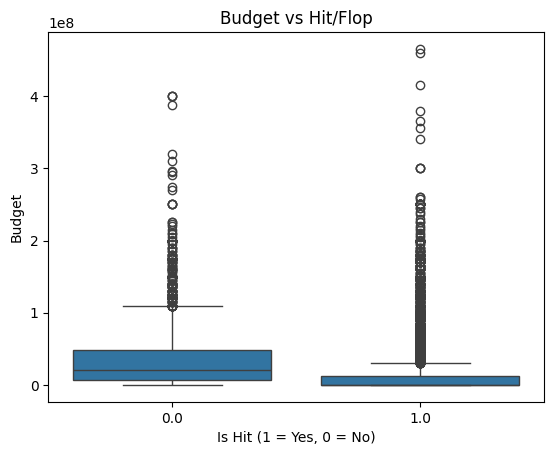

In [24]:
sns.boxplot(data=df, x="is_hit", y="budget")
plt.title("Budget vs Hit/Flop")
plt.xlabel("Is Hit (1 = Yes, 0 = No)")
plt.ylabel("Budget")
plt.show()

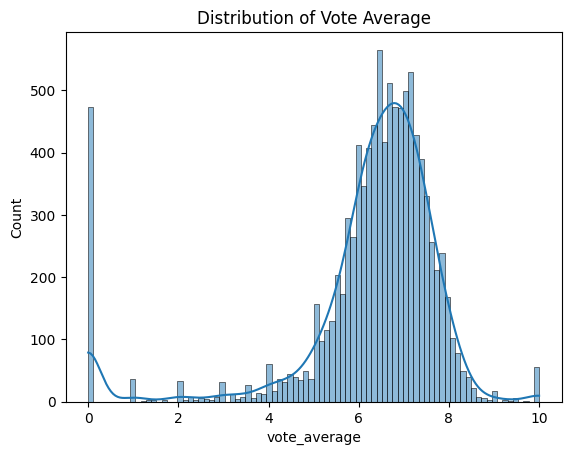

In [25]:
sns.histplot(df["vote_average"], kde=True)
plt.title("Distribution of Vote Average")
plt.show()

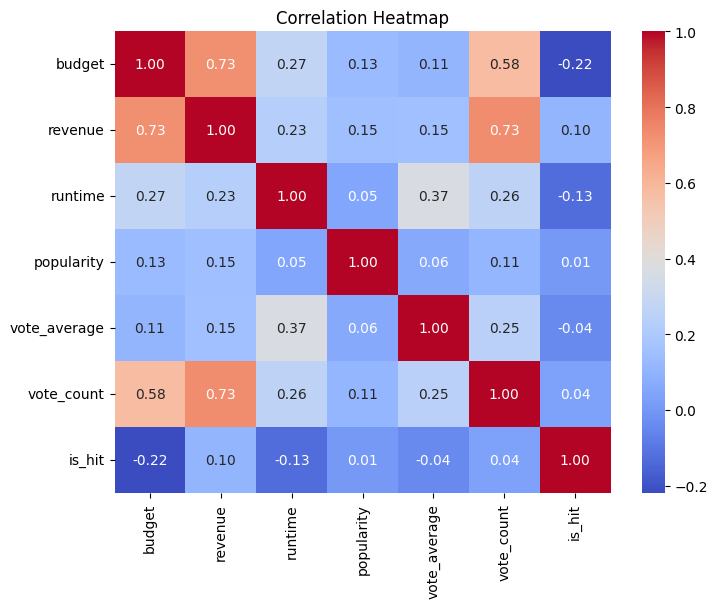

In [26]:
numeric_cols = ["budget", "revenue", "runtime", "popularity", "vote_average", "vote_count", "is_hit"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

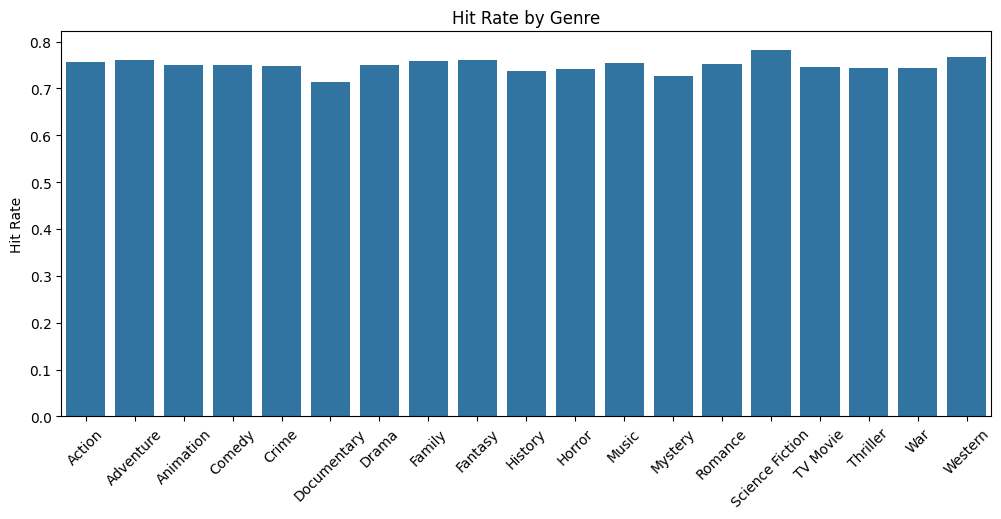

In [27]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
              'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

hit_rates = {}
for genre in genre_cols:
    genre_df = df[df[genre] == 1]
    hit_rate = genre_df["is_hit"].mean()
    hit_rates[genre] = hit_rate

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=list(hit_rates.keys()), y=list(hit_rates.values()))
plt.xticks(rotation=45)
plt.ylabel("Hit Rate")
plt.title("Hit Rate by Genre")
plt.show()

In [28]:
df = pd.get_dummies(df, columns=["original_language"])
X = df.drop(columns=["title", "revenue", "is_hit", "overview", "release_date"])
y = df["is_hit"]
X = X.dropna()
y = y.loc[X.index]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", RandomForestClassifier(random_state=42))
    ])

param_grid = {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5],
        "model__class_weight": ["balanced"]
    }

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring="f1", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best params:", grid_search.best_params_)
print(classification_report(y_test, y_pred, output_dict=True))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'model__class_weight': 'balanced', 'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
{'0.0': {'precision': 0.7022727272727273, 'recall': 0.6204819277108434, 'f1-score': 0.6588486140724946, 'support': 498.0}, '1.0': {'precision': 0.8782216494845361, 'recall': 0.9123159303882196, 'f1-score': 0.8949441891004596, 'support': 1494.0}, 'accuracy': 0.8393574297188755, 'macro avg': {'precision': 0.7902471883786317, 'recall': 0.7663989290495314, 'f1-score': 0.7768964015864771, 'support': 1992.0}, 'weighted avg': {'precision': 0.8342344189315839, 'recall': 0.8393574297188755, 'f1-score': 0.8359202953434685, 'support': 1992.0}}
